<a href="https://colab.research.google.com/github/cly1213/Colab/blob/master/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

In [0]:
os.chdir("/content/gdrive/My Drive") #change directory

In [0]:
os.getcwd()

In [0]:
!ls

In [0]:
import pandas as pd
dataset = pd.read_csv('./input/titanic.csv')
dataset

In [0]:
dataset.shape

In [0]:
dataset.info()

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [0]:
def bar_chart(feature):
  survived = dataset[dataset['Survived']==1][feature].value_counts() 
  dead = dataset[dataset['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived','Dead']
  df.plot(kind='bar',stacked=True, figsize=(10,5))

In [0]:
bar_chart('Sex')

In [0]:
bar_chart('Pclass')

In [0]:
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

#https://reurl.cc/qeZQE
#https://reurl.cc/Neb8n

In [0]:
dataset['Title'].value_counts()

In [0]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2}

dataset['Title'] = dataset['Title'].map(title_mapping)


In [0]:
#add 
dataset['Title'] = dataset['Title'].fillna(3)

In [0]:
bar_chart('Title')

In [0]:
sex_mapping = {"male":0, "female":1}
dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [0]:
bar_chart('Sex')

In [0]:
dataset.head(100)

In [0]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others) 
dataset["Age"].fillna(dataset.groupby("Title")["Age"].transform("median"), inplace=True) 
dataset["Age"]

In [0]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4) 
facet.map(sns.kdeplot,'Age',shade= True) 
facet.set(xlim=(0, dataset['Age'].max())) 
facet.add_legend()

plt.show()

In [0]:
dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0, 
dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1, 
dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2, 
dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3, 
dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [0]:
dataset.head()

In [0]:
bar_chart('Age')

In [0]:
Pclass1 = dataset[dataset['Pclass']==1]['Embarked'].value_counts() 
Pclass2 = dataset[dataset['Pclass']==2]['Embarked'].value_counts() 
Pclass3 = dataset[dataset['Pclass']==3]['Embarked'].value_counts() 
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class'] 
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [0]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')
dataset.head(100)


In [0]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)


In [0]:
dataset.head(100)

In [0]:
#fill missing Fare with median fare for each Pclass
dataset["Fare"].fillna(dataset.groupby("Pclass")["Fare"].transform("median"), inplace=True) 
dataset["Fare"]

In [0]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True) 
facet.set(xlim=(0, dataset['Fare'].max())) 
facet.add_legend()
plt.show()

In [0]:
dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0, 
dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1, 
dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,  
dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [0]:
dataset.head(50)

In [0]:
dataset.Cabin.value_counts()

In [0]:
dataset['Cabin'] = dataset['Cabin'].str[:1]
Pclass1 = dataset[dataset['Pclass']==1]['Cabin'].value_counts() 
Pclass2 = dataset[dataset['Pclass']==2]['Cabin'].value_counts() 
Pclass3 = dataset[dataset['Pclass']==3]['Cabin'].value_counts() 
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class'] 
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [0]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8} 
dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [0]:
# fill missing Cabin with median cabin for each Pclass 
dataset["Cabin"].fillna(dataset.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [0]:
dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1

In [0]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4) 
facet.map(sns.kdeplot,'FamilySize',shade= True) 
facet.set(xlim=(0, dataset['FamilySize'].max())) 
facet.add_legend()
plt.xlim(0)

In [0]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4} 
dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)
 

In [0]:
features_drop = ['Ticket','SibSp','Parch', 'PassengerId','Name']
dataset = dataset.drop(features_drop, axis=1)

In [0]:
dataset_data = dataset.drop('Survived', axis=1)
dataset_target = dataset['Survived']

#dataset_data['Title'] = dataset_data['Title'].fillna('3')

dataset_data.shape, dataset_target.shape

In [0]:
dataset_data

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import Adam
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1)) 

scaledFeatures = minmax_scale.fit_transform(dataset_data)

In [0]:
def build_model():
  #build model
  model = Sequential()
  
  model.add(Dense(input_dim=8,units=40,activation ='relu'))
  model.add(Dense(units=100,activation ='relu'))
  model.add(Dense(units=10,activation ='relu'))
  model.add(Dense(units=1,activation ='sigmoid'))
  model.summary()
  
  return model


In [0]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 40)                360       
_________________________________________________________________
dense_78 (Dense)             (None, 100)               4100      
_________________________________________________________________
dense_79 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 11        
Total params: 5,481
Trainable params: 5,481
Non-trainable params: 0
_________________________________________________________________
Train on 712 samples, validate on 179 samples
Epoch 1/20
712/712 [==============================] - 2s 2ms/step - loss: 0.6656 - acc: 0.6545 - val_loss: 0.6027 - val_acc: 0.8101
Epoch 2/20
712/712 [==============================] - 0s 80us/step - loss: 0.5532 - acc: 0.796

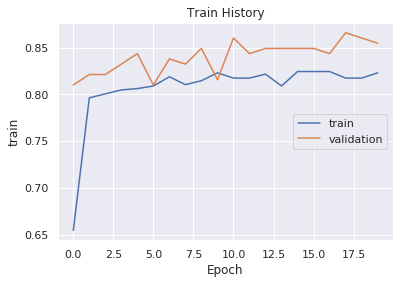

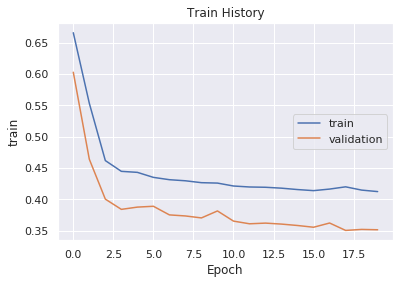

In [0]:
model = build_model()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
train_history = model.fit(scaledFeatures, dataset_target, validation_split=0.2, batch_size=30, epochs=20)

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')